# Sección 12.6, Problema 3

In this problem, you will perform K-means clustering manually, with `K = 2`, on a small example with `n = 6` observations and `p = 2` features. The observations are as follows.

$$
\begin{array}{|c|c|c|}
\hline
\text{Obs.} & X_1 & X_2 \\
\hline
1 & 1 & 4 \\
2 & 1 & 3 \\
3 & 0 & 4 \\
4 & 5 & 1 \\
5 & 6 & 2 \\
6 & 4 & 0 \\
\hline
\end{array}
$$

(a) Plot the observations.

In [131]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

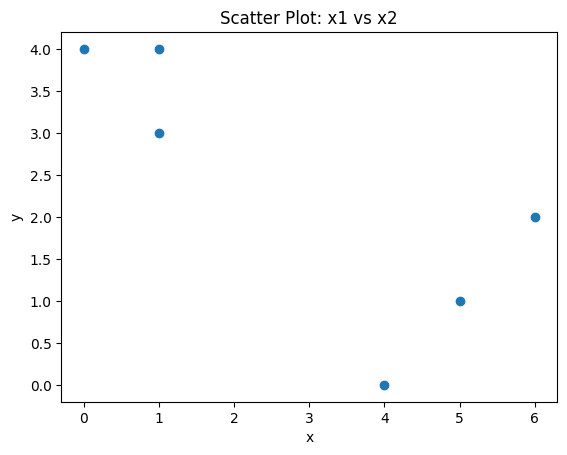

In [132]:
x1 = np.array([1, 1, 0, 5, 6, 4])
x2 = np.array([4, 3, 4, 1, 2, 0])
df = pd.DataFrame({'x1': x1, 'x2': x2})
plt.scatter(x1, x2)
plt.title("Scatter Plot: x1 vs x2")
plt.xlabel("x")
plt.ylabel("y")
plt.show()

(b) Randomly assign a cluster label to each observation. You can use
the `np.random.choice()` function to do this. Report the cluster
labels for each observation.

In [133]:
df["cluster"] = np.random.choice([0, 1], size=len(df))
df.head()

,x1,x2,cluster
0,1,4,1
1,1,3,1
2,0,4,0
3,5,1,0
4,6,2,1


(c) Compute the centroid for each cluster.

In [134]:
cluster0 = df[df["cluster"] == 0]
cluster1 = df[df["cluster"] == 1]
mean0 = cluster0.mean()
mean1 = cluster1.mean()
centroid0 = np.array([mean0["x1"], mean0["x2"]])
centroid1 = np.array([mean1["x1"], mean1["x2"]])
print(f"Centroid for cluster 0: ({centroid0[0]}, {centroid0[1]})")
print(f"Centroid for cluster 1: ({centroid1[0]}, {centroid1[1]})")

Centroid for cluster 0: (2.5, 2.5)
Centroid for cluster 1: (3.0, 2.25)


(d) Assign each observation to the centroid to which it is closest, in
terms of Euclidean distance. Report the cluster labels for each
observation

In [135]:
def calculate_shortest_distance(row):
    x = np.array([row['x1'], row['x2']])
    distance0 = np.linalg.norm(x - centroid0)
    distance1 = np.linalg.norm(x - centroid1)
    if distance0 < distance1:
        row['cluster'] = 0
    else:
        row['cluster'] = 1
    return row

df = df.apply(calculate_shortest_distance, axis=1)
df.head()

,x1,x2,cluster
0,1,4,0
1,1,3,0
2,0,4,0
3,5,1,1
4,6,2,1


(e) Repeat (c) and (d) until the answers obtained stop changing.

In [136]:
initial_cluster = df["cluster"].copy()
while initial_cluster.equals(df["cluster"]) == False:
    cluster0 = df[df["cluster"] == 0]
    cluster1 = df[df["cluster"] == 1]
    mean0 = cluster0.mean()
    mean1 = cluster1.mean()
    centroid0 = np.array([mean0["x1"], mean0["x2"]])
    centroid1 = np.array([mean1["x1"], mean1["x2"]])
    df = df.apply(calculate_shortest_distance, axis=1)
df.head()

,x1,x2,cluster
0,1,4,0
1,1,3,0
2,0,4,0
3,5,1,1
4,6,2,1


(f) In your plot from (a), color the observations according to the
cluster labels obtained

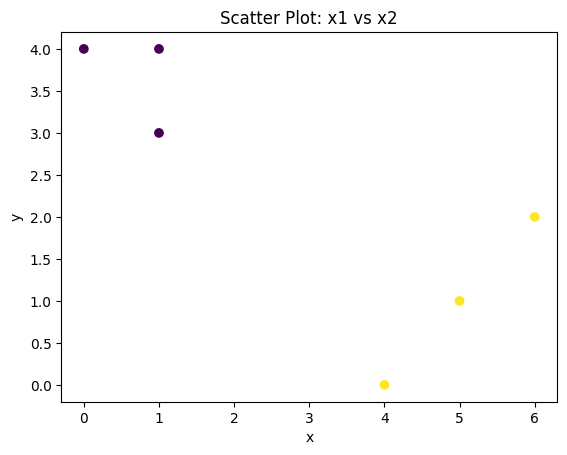

In [137]:
plt.scatter(x1, x2, c=df["cluster"])
plt.title("Scatter Plot: x1 vs x2")
plt.xlabel("x")
plt.ylabel("y")
plt.show()